In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
DATA_PATH = 'c:\\Users\\Public\\Documents\\Lesson_4.1\\names\\'

In [41]:
def get_dataframe(years):
    data = {}
    for year in years:
        data[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(str(year)), names=['Name','Gender','Count'])
        names_all = pd.concat(data, names=['Year', 'Pos'])
    return names_all

## График изменения количества имен Ruth и Robert с 1900 по 2000

In [42]:
def get_plot_by_names():
    years = list(range(1900, 2000))
    names_all = get_dataframe(years)
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    plot_by_names = name_dynamics.query('Name == ["Robert", "Ruth"]').unstack('Name')
    return plot_by_names.plot()

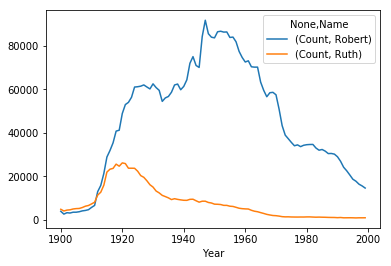

In [43]:
get_plot_by_names()

## Гистограмма по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

In [44]:
def get_plotbar_by_names():
    years = list(range(1900, 2000, 5))
    names_all = get_dataframe(years)
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    plotbar_by_names = name_dynamics.query('Name == ["Robert", "Ruth"]').unstack('Name')
    return plotbar_by_names.plot.bar()

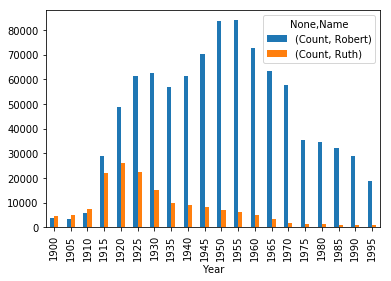

In [45]:
get_plotbar_by_names()

## Круговая диаграмма по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год

In [46]:
def get_plotpie_by_names():
    years = [1950]
    names_all = get_dataframe(years)   
    names_group = names_all[names_all['Name'].map(lambda x: x.startswith('R'))].groupby('Name').sum()
    plotpie_by_names = names_group.sort_values(by="Count", ascending=False).head(10)
    return plotpie_by_names.plot.pie("Count")

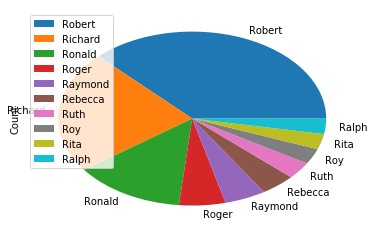

In [47]:
get_plotpie_by_names()

## Точечная диаграмма по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений"

In [48]:
def get_plotscatter_by_names():
    years = list(range(1900, 2000))
    names_all = get_dataframe(years)
    names = names_all.groupby(['Name']).sum().sort_values(by="Count", ascending=False)
    names.reset_index(inplace=True)
    names['Len'] = names.apply(lambda row: sum(letter not in set("aeiouy") for letter in str(row.Name).lower()), axis=1)
    return names.plot.scatter(x='Len', y='Count')

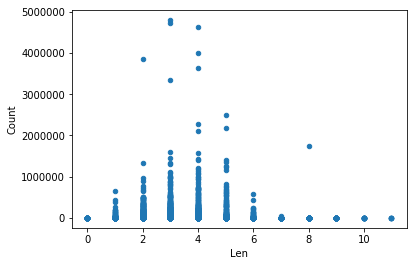

In [49]:
get_plotscatter_by_names()